In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv("greatlakedata/miHuron1918.csv", header = 2, index_col = 0) #read data
data = data.drop([2021, 2022]) #drop years with nan values
a = data.unstack().values #unstack 2d data into one long 1d list
a

array([176.71, 176.74, 176.5 , ..., 176.83, 177.25, 177.14])

In [31]:
data_average = np.mean(a) #standardization
data_deviation = np.std(a)
for i in range(len(a)):
    a[i] -= data_average
    a[i] /= data_deviation

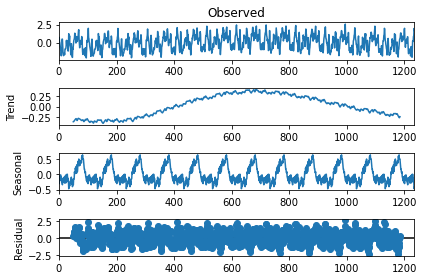

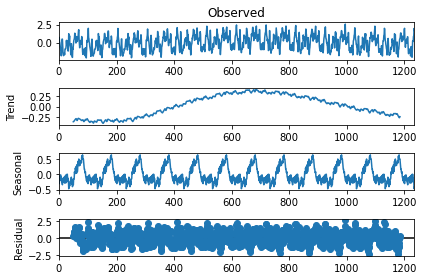

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(a, model='additive', period = 100) 
result.plot()

<function matplotlib.pyplot.show(*args, **kw)>

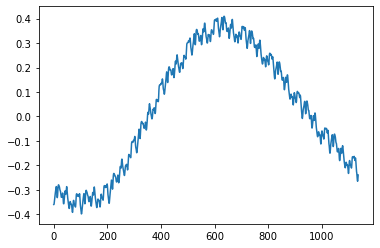

In [33]:
data=result.trend[np.logical_not(np.isnan(result.trend))]
x=np.arange(0,data.size)
plt.plot(x,data)
plt.show


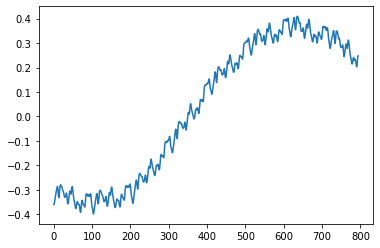

In [34]:
train_x = x[:int(0.70*x.size)]
train_y = data[:int(0.70*x.size)]

test_x = x[int(0.70*x.size):]
test_y = data[int(0.70*x.size):]
plt.plot(train_x,train_y)
plt.show()

线性回归平均绝对误差1:  0.08222063672704213
线性回归均方误差1:  0.009456969969602819
线性回归平均绝对误差predict:  0.6895608742477896
线性回归均方误差predict:  0.5395385186085254


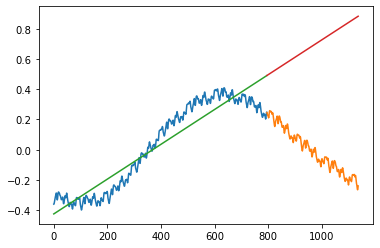

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x.reshape(len(train_x),1), train_y.reshape(len(train_y),1))
results=model.predict(train_x.reshape(len(train_x),1))
plt.plot(train_x,train_y)
plt.plot(test_x,test_y)
plt.plot(train_x,results)
pred = model.predict(test_x.reshape(len(test_x),1))
plt.plot(test_x,pred)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("线性回归平均绝对误差1: ", mean_absolute_error(train_y, results.flatten()))
print("线性回归均方误差1: ", mean_squared_error(train_y, results.flatten()))
print("线性回归平均绝对误差predict: ", mean_absolute_error(test_y, pred.flatten()))
print("线性回归均方误差predict: ", mean_squared_error(test_y, pred.flatten()))

2 次多项式回归平均绝对误差2:  0.0753880499418173
2 次多项式均方根误差2:  0.007893934321767859
2 次多项式回归平均绝对误差2:  0.4548702549834127
2 次多项式均方根误差2:  0.23271822571745446


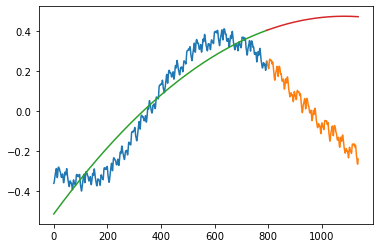

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_train_x_2 = poly_features_2.fit_transform(train_x.reshape(len(train_x),1))
poly_test_x_2 = poly_features_2.fit_transform(test_x.reshape(len(test_x),1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
plt.plot(train_x,train_y)
plt.plot(test_x,test_y)
model.fit(poly_train_x_2, train_y.reshape(len(train_x),1)) # 训练模型
results_2 = model.predict(poly_train_x_2) # 预测结果
results_2.flatten()
pred_2 = model.predict(poly_test_x_2) # 预测结果
pred_2.flatten() # 打印扁平化后的预测结果

plt.plot(train_x,results_2)
plt.plot(test_x,pred_2)

print("2 次多项式回归平均绝对误差2: ", mean_absolute_error(train_y, results_2))
print("2 次多项式均方根误差2: ", mean_squared_error(train_y, results_2))
print("2 次多项式回归平均绝对误差2: ", mean_absolute_error(test_y, pred_2))
print("2 次多项式均方根误差2: ", mean_squared_error(test_y, pred_2))




3 degree mae:  0.024126316221192993
3 degree mse:  0.0008576517836451094
3 degree mae predicted:  0.834122936987768
3 degree mse predicted:  1.098224412856507
---
7 degree mae:  0.022081212192628097
7 degree mse:  0.0006875979555524871
7 degree mae predicted:  7.030241259937914
7 degree mse predicted:  115.6594641293292
---
8 degree mae:  0.02255161800856048
8 degree mse:  0.0007345453369610023
8 degree mae predicted:  9.097254693249024
8 degree mse predicted:  202.62684790510517
---
9 degree mae:  0.02230756340898211
9 degree mse:  0.0006983297385273684
9 degree mae predicted:  9.350381103468393
9 degree mse predicted:  270.57696809711103
---
10 degree mae:  0.023243267115036412
10 degree mse:  0.0007821788292637649
10 degree mae predicted:  84.09101593588365
10 degree mse predicted:  21277.337095408617
---


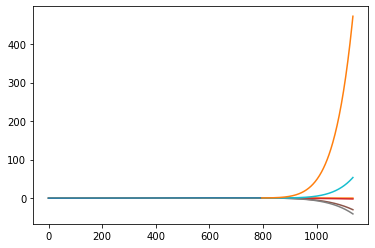

In [37]:
from sklearn.pipeline import make_pipeline
plt.plot(train_x,train_y)
plt.plot(test_x,test_y)
train_x = train_x.reshape(len(train_x),1)
test_x = test_x.reshape(len(test_x),1)
train_y = train_y.reshape(len(train_y),1)

for m in [3,7,8,9,10]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y)
    new_y = model.predict(train_x)
    pre_y = model.predict(test_x)
    plt.plot(train_x,new_y)
    plt.plot(test_x,pre_y)
    print("{} degree mae: ".format(m), mean_absolute_error(train_y, new_y.flatten()))
    print("{} degree mse: ".format(m), mean_squared_error(train_y, new_y.flatten()))
    print("{} degree mae predicted: ".format(m), mean_absolute_error(test_y, pre_y.flatten()))
    print("{} degree mse predicted: ".format(m), mean_squared_error(test_y, pre_y.flatten()))
    print("---")


MSE 计算结果:  [0.5395385186085254, 0.23271822571745446, 1.098224412856507, 0.2715396224225743, 0.9444266058478205, 5.613958027294349, 115.6594641293292, 202.62684790510517, 270.57696809711103, 21277.337095408617, 255188.58154108826, 1810779.448969072, 9785068.824214164, 45183271.03794043, 43493733.45962487, 130459379.56351274, 376484891.77025265, 1052473186.9900576, 2865037194.7755957, 7625680795.088008]


Text(0, 0.5, 'MSE Predicted')

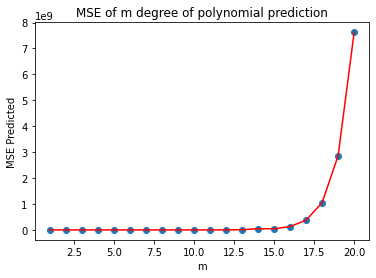

In [38]:
mse = [] # 用于存储各最高次多项式 MSE 值
m = 1 # 初始 m 值
m_max = 20 # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y) # 训练模型
    pre_y = model.predict(test_x) # 测试模型
    mse.append(mean_squared_error(test_y, pre_y.flatten())) # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, 'r')
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial prediction")
plt.xlabel("m")
plt.ylabel("MSE Predicted")


MP fitting


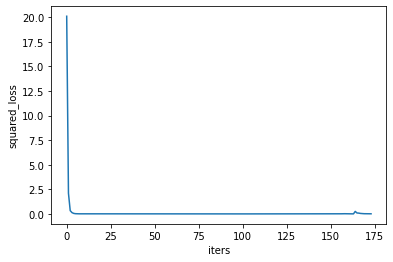

0.001863873480557893
1
174


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

from sklearn import metrics
from sklearn.model_selection import train_test_split
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
#PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
## 定义含有4个隐藏层的MLP网络
mlpr = MLPRegressor(hidden_layer_sizes=(68,68,68,68,68,68,68), ## 隐藏层的神经元个数
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001,   ## L2惩罚参数
                    max_iter=100000, 
                    learning_rate="adaptive",
                    learning_rate_init=0.001,
                    n_iter_no_change=50,
                    warm_start=True
                   )

## 拟合训练数据集
mlpr.fit(train_x,train_y)
## 可视化损失函数
print('MP fitting')
plt.figure()
plt.plot(mlpr.loss_curve_)
plt.xlabel("iters")
plt.ylabel(mlpr.loss)
plt.show()
print(mlpr.best_loss_)
print(mlpr.n_features_in_)
print(mlpr.n_iter_)

mse:
0.164264708984405


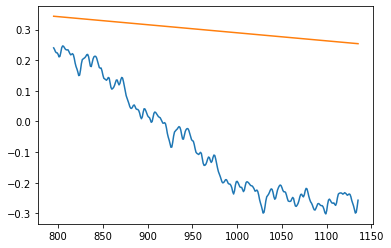

In [11]:

plt.plot(test_x,test_y)

plt.plot(test_x,mlpr.predict(test_x))
print("mse:")
print(mean_squared_error(test_y, mlpr.predict(test_x)))